## 题目1
Fish Market Data Set是一个关于鱼类特征和重量的数据集，包括了7种不同鱼类的属性数据和体重数据，共159个样本。该数据集可用于回归任务，以预测鱼的种类或体重。

数据集包含以下属性：

Species: 鱼的种类
Weight: 鱼的重量，单位为克（g）
Length1: 从头到尾的长度，单位为厘米（cm）
Length2: 从头到腹部底部的长度，单位为厘米（cm）
Length3: 从头到尾柄的长度，单位为厘米（cm）
Height: 身体高度，单位为厘米（cm）
Width: 身体宽度，单位为厘米（cm）

### 问题

1、使用数据集考虑回归问题预测鱼的重量，定义随机森林回归模型和超参数候选列表（比如param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [3, 5, 7, None],
    "max_features": ["auto", "sqrt", "log2"]}）
}，并使用网格搜索交叉验证寻找最佳超参数组合

2、使用最佳超参数组合模型，输出常用回归指标的性能（比如$R^2$, MSE等）。

In [1]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 假设你已经将fish_market.csv保存至本目录下，只需运行下面一行即可
df = pd.read_csv("Data/fish_market.csv")

# 数据预处理
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

# 数据预处理
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

# 定义随机森林回归模型
rf = RandomForestRegressor()

# 定义超参数候选列表
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [3, 5, 7, None],
    "max_features": ["auto", "sqrt", "log2"]
}

# 使用网格搜索寻找最佳超参数组合
rf_cv = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
rf_cv.fit(X, y)

# 输出最佳超参数组合及对应的交叉验证模型回归性能
print("Best parameters:", rf_cv.best_params_)
print("Cross-validation score:", rf_cv.best_score_)

# 使用最佳参数建模
best_rf = rf_cv.best_estimator_

# 输出常用回归指标的性能
y_pred = best_rf.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best parameters: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
Cross-validation score: 0.7615131168064705
Mean Squared Error: 0.0002657004750311427
R-squared: 0.8480916285366671


## 题目2

Mushroom Data Set（蘑菇数据集）是一个二分类问题数据集，用于分类有毒蘑菇和可食用蘑菇。该数据集包含8124个蘑菇的观测数据，每个蘑菇具有22个特征，包括蘑菇的颜色、形状、气味等等。这些特征的取值为离散值或枚举值，用于描述蘑菇的各种特征。目标变量为有毒或可食用的标签，分别用p和e表示。该数据集通常用于机器学习的分类问题和特征选择问题。

### 问题
1、请基于Mushroom Data Set数据集，定义SVM模型和超参数候选列表，并使用网格搜索输出最佳超参数组合和对应的交叉验证准确率。

2、使用上述最佳组合构建模型，输出混淆矩阵、分类准确率、错误率、查准率、查全率、F1-score、ROC曲线及ROC曲线下面积（AUC）等常用的分类模型评估指标


Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-validation accuracy: 100.00%
Confusion matrix:
 [[1181    0]
 [   0 1257]]
Accuracy: 100.00%
Error rate: 0.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

ROC AUC: 1.00


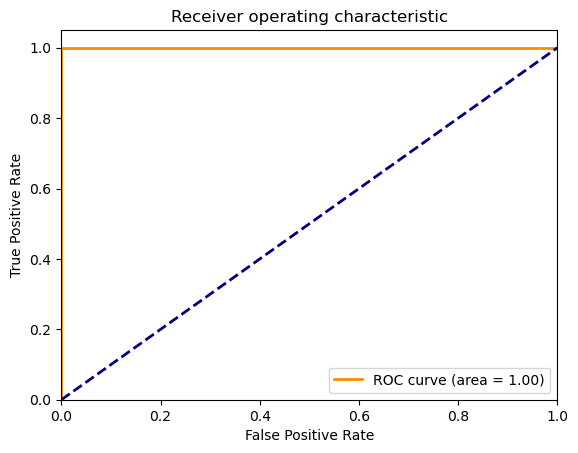

In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 导入数据集
data = pd.read_csv("Data/mushrooms.csv")

X = data.iloc[:, 1:]  # 特征列
y = data.iloc[:, 0]  # 标签列

# 将特征列进行编码
le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col])
y = y.apply(lambda x: 0 if x == 'p' else 1)

# 数据预处理
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义SVM模型
svm = SVC(probability=True)

# 定义超参数候选列表
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# 使用网格搜索寻找最佳超参数组合
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 输出最佳超参数组合和对应的交叉验证准确率
print("Best parameters: ", grid_search.best_params_)
print("Cross-validation accuracy: %.2f%%" % (grid_search.best_score_*100))


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 数据预处理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 定义SVM模型
svm = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
svm.fit(X_train, y_train)

# 输出混淆矩阵
y_pred = svm.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

# 输出分类准确率和错误率
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("Accuracy: %.2f%%" % (accuracy*100))
print("Error rate: %.2f%%" % (error_rate*100))

# 输出查准率、查全率、F1-score等指标
print(classification_report(y_test, y_pred))

# 输出ROC曲线及AUC
y_pred_proba = svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC: %.2f" % roc_auc)

# 绘制ROC曲线
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 练习3

客户分类数据集（customer）包含多种特征，主要分为数值特征和类别特征。数值特征包括客户的年收入（Income）、上次参与活动的天数（Recency）、客户年龄（Age）、自首次注册以来的时长（Customer_For）、总消费金额（Spent），以及客户家庭中的孩子数量（Children）。这些数值特征可以直接用于模型训练，或在标准化之后用于聚类分析。类别特征则包括客户的教育水平（Education）、家庭状况（Living_With，如“单独”或“伴侣”）、家庭成员数量（Family_Size）以及是否有孩子（Is_Parent）。这些类别特征需要通过独热编码或标签编码转化为数值形式，以便输入到聚类模型中。使用不同的无监督学习方法对客户进行聚类，以确定不同客户群体的特点。

### 问题
1、对顾客数据集进行清理，包括处理缺失值、标准化和独热编码，将所有特征转化为数值特征。并使用PCA将高维特征降至三维，绘制PCA结果的三维散点图。

2、使用K-Means算法进行聚类，定义超参数候选列表并通过肘部法确定最佳聚类数量。

3、使用轮廓系数、组间和组内的差异性、集群可解释性等指标评估聚类效果，输出相应的聚类性能指标。

Number of datapoints: 2240
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPur

<Figure size 800x550 with 0 Axes>

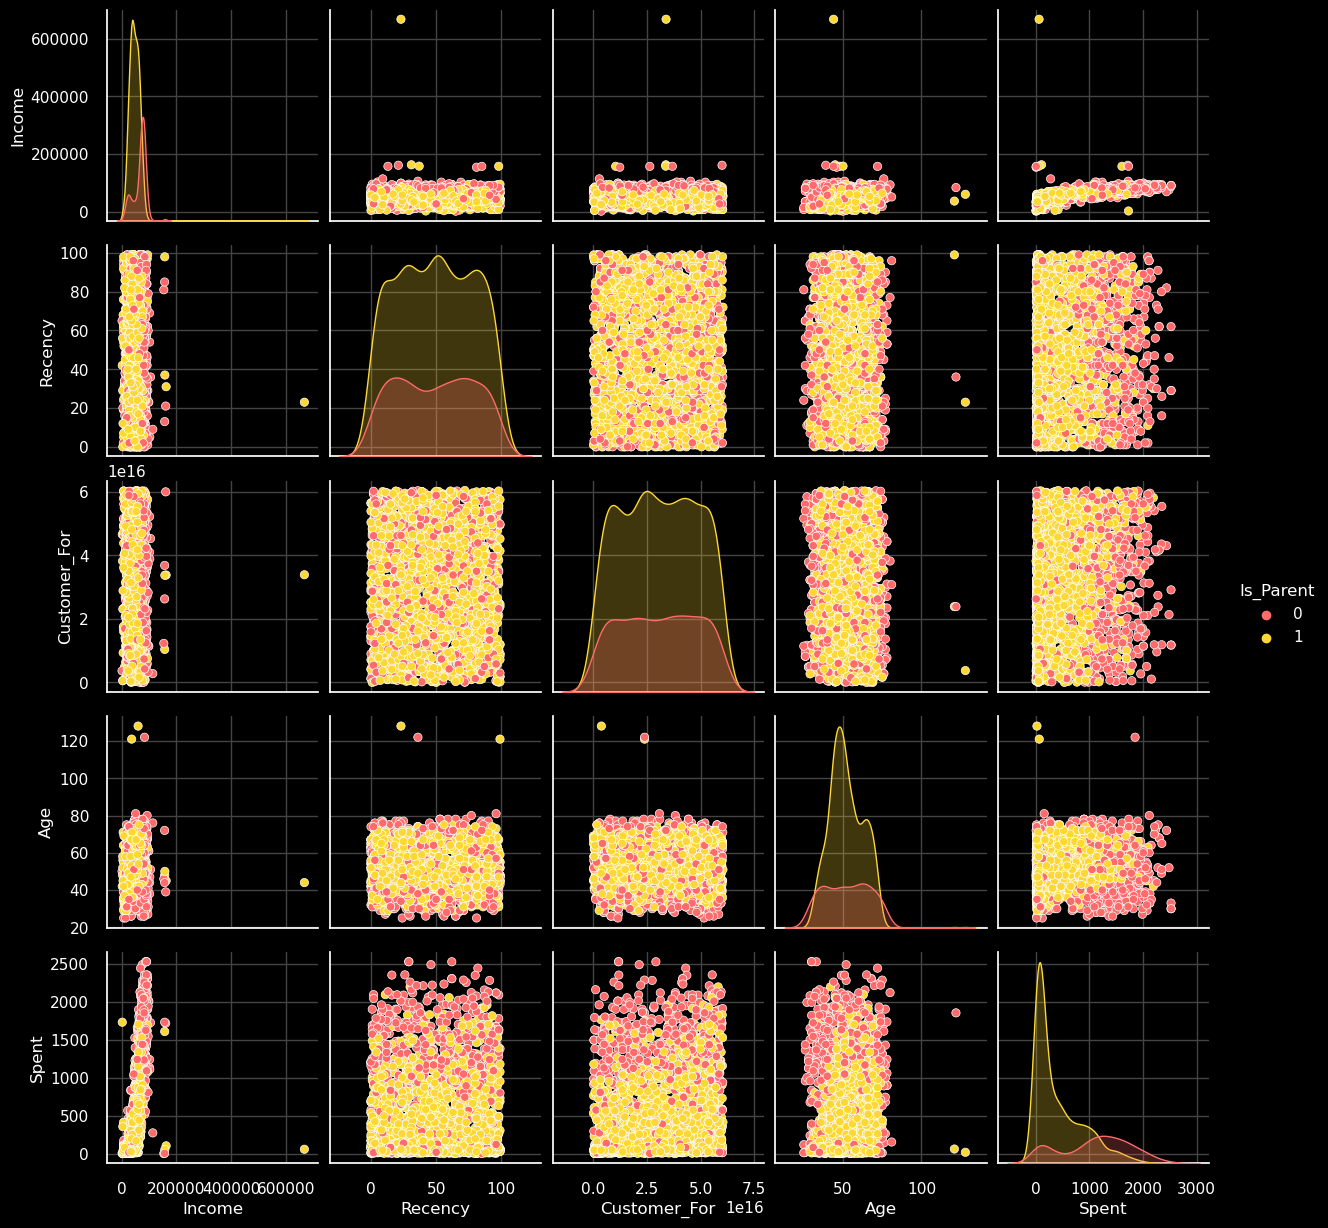

The total number of data-points after removing the outliers are: 2212


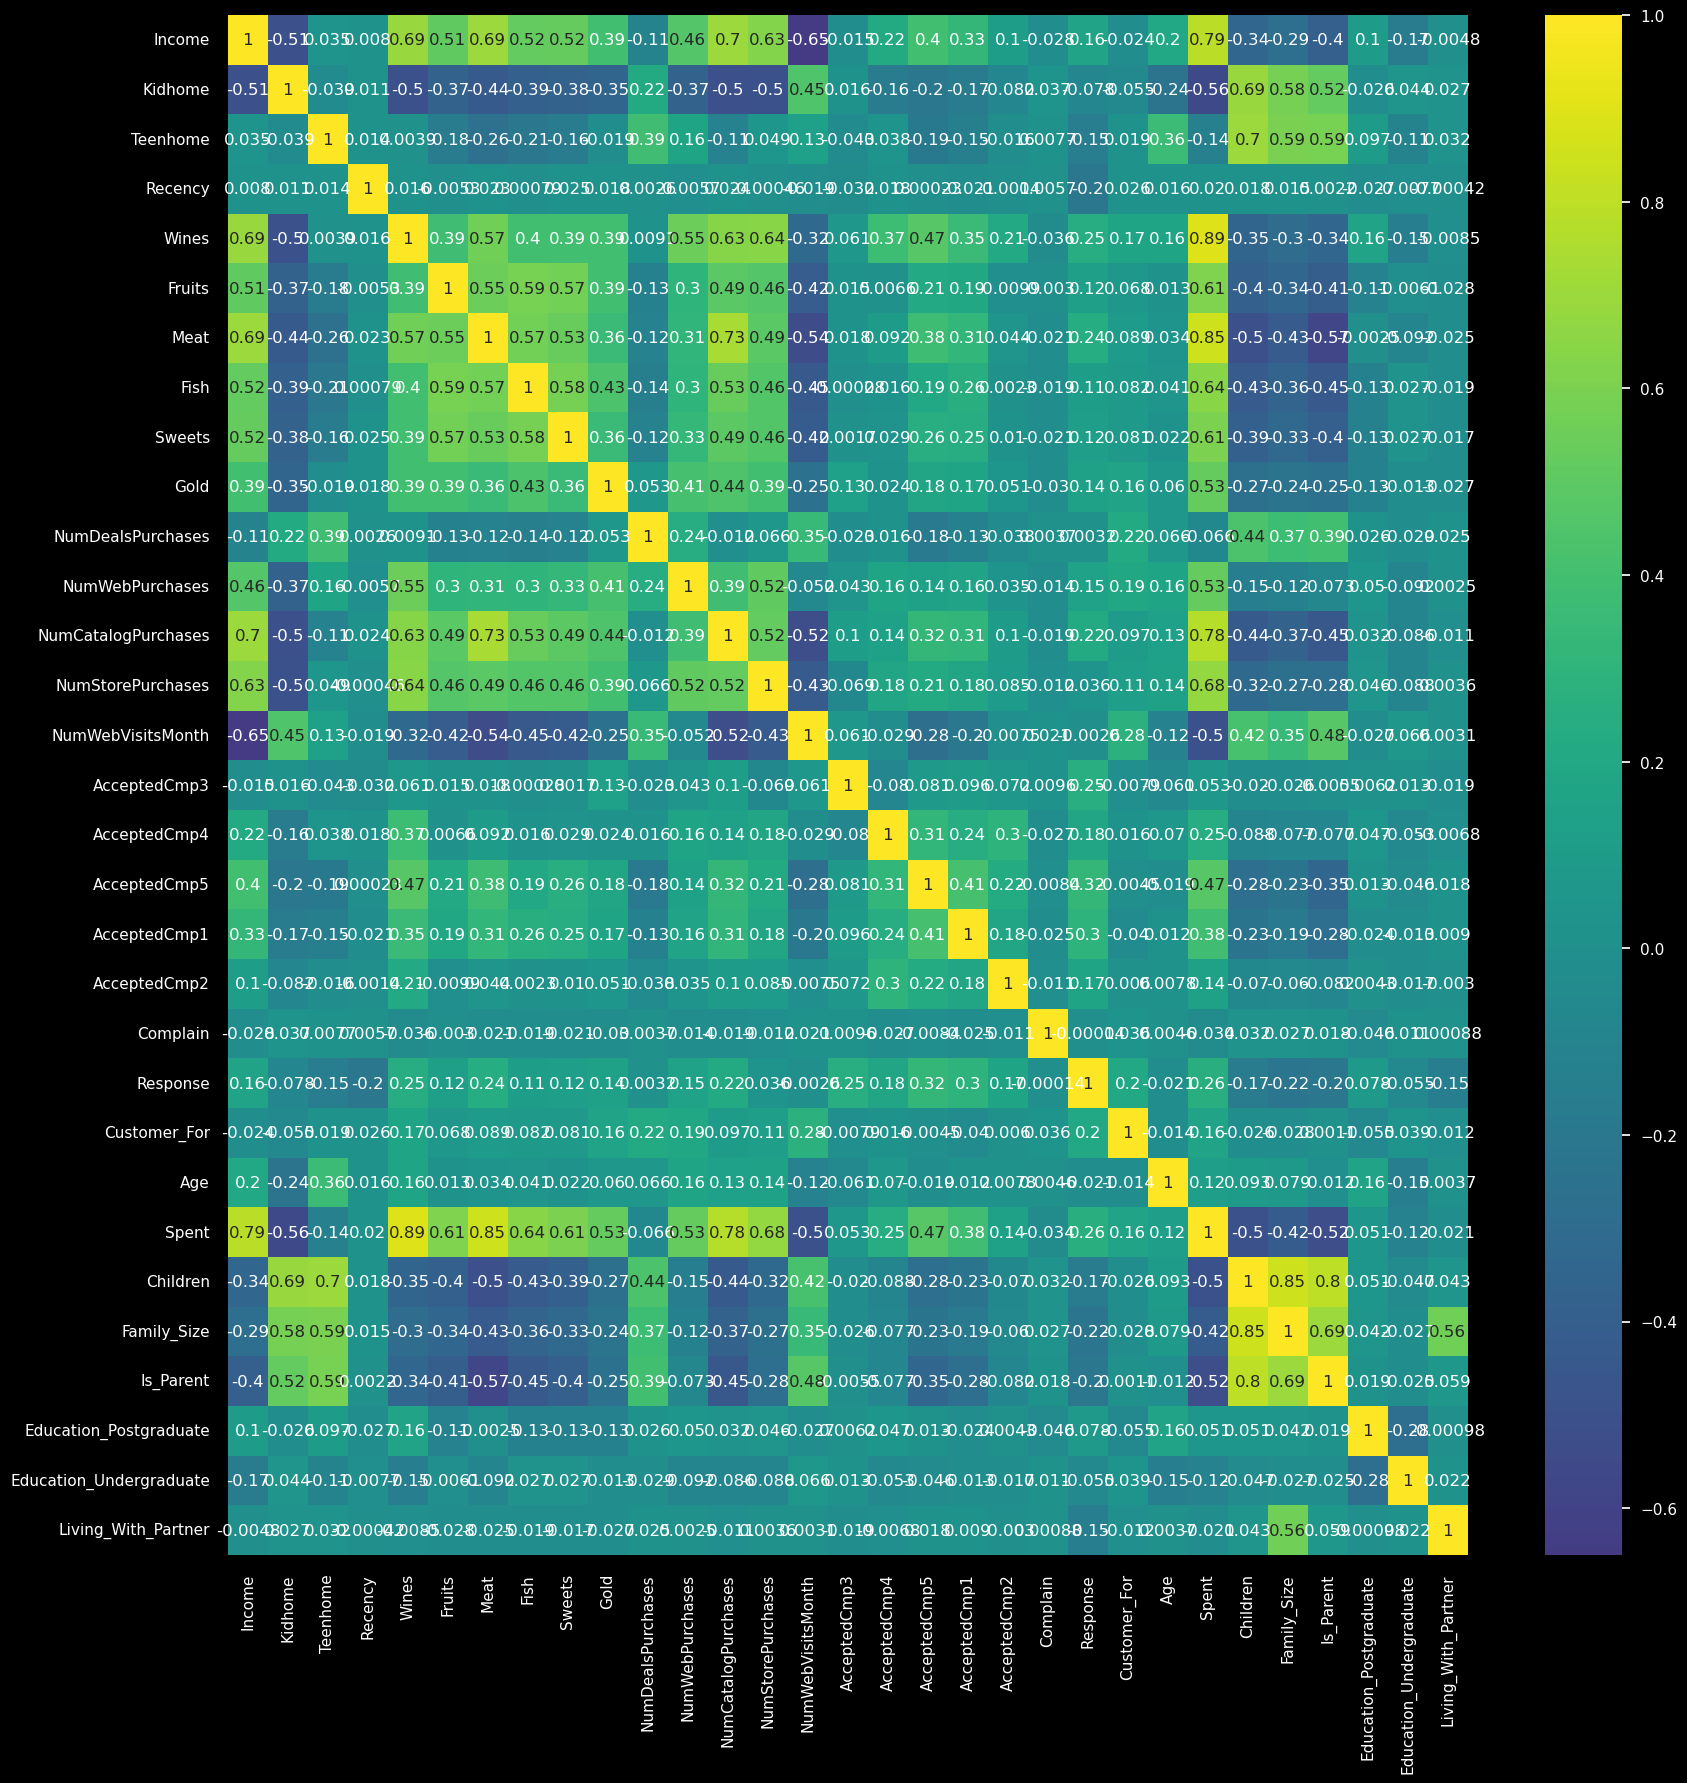

Categorical variables in the dataset: ['Education', 'Living_With']
All features are now numerical
All features are now scaled


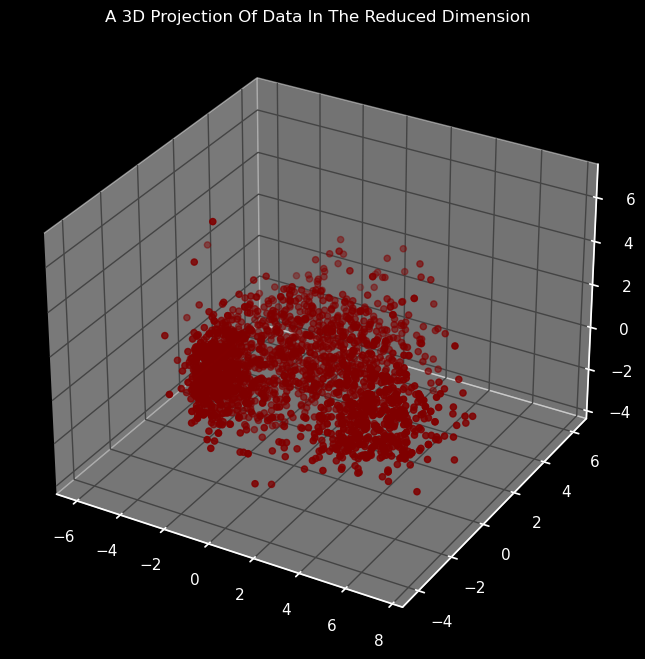

Elbow Method to determine the number of clusters to be formed:


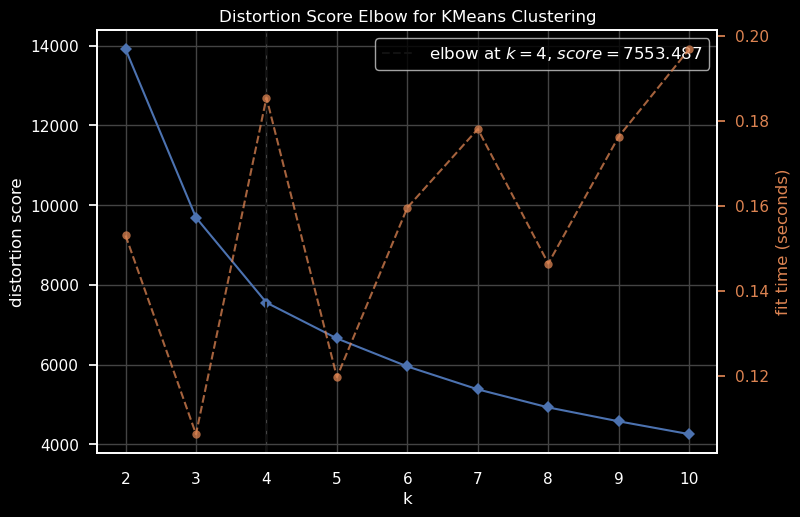

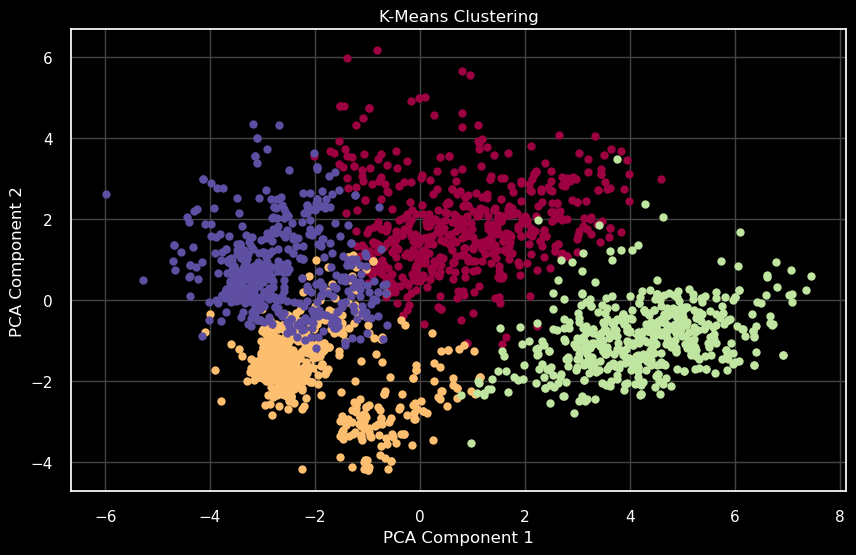

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.cluster import DBSCAN
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
data = pd.read_csv("Data/customer.csv")
print("Number of datapoints:", len(data))
data.head()
data.info()
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

# 将日期字符串解析为日期时间对象
from datetime import datetime
date_string = "21-08-2013"
date_format = "%d-%m-%Y"  # Correct format matching the input string
parsed_date = datetime.strptime(date_string, date_format)
print(parsed_date)

# 将 'Dt_Customer' 列转换为日期时间格式
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
dates = data["Dt_Customer"].dt.date
print("The newest customer's enrollment date in the records:", max(dates))
print("The oldest customer's enrollment date in the records:", min(dates))

# 计算客户在数据库中的存在天数
days = []
d1 = max(dates) # 选择最新注册客户的日期
for i in dates:
    delta = d1 - i # 计算与最新注册日期的差值
    days.append(delta)
data["Customer_For"] = days # 将结果存入新列
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce") # 转换为数值类型

# 计算客户年龄
data["Age"] = 2021-data["Year_Birth"]
# 计算客户的消费总额
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+\
                data["MntSweetProducts"]+ data["MntGoldProds"]
# 将家庭状况进行合并，简化为 'Living_With'
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", 
                                                    "Together":"Partner", 
                                                    "Absurd":"Alone", 
                                                    "Widow":"Alone", 
                                                    "YOLO":"Alone", 
                                                    "Divorced":"Alone", 
                                                    "Single":"Alone",})
# 计算孩子的数量
data["Children"]=data["Kidhome"]+data["Teenhome"]
# 计算家庭规模
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]
# 标记是否是家长
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)
# 简化教育水平的分类
data["Education"]=data["Education"].replace({"Basic":"Undergraduate",
                                             "2n Cycle":"Undergraduate", 
                                             "Graduation":"Graduate", 
                                             "Master":"Postgraduate", 
                                             "PhD":"Postgraduate"})
# 重命名一些列以更清晰
data=data.rename(columns={"MntWines": "Wines",
                          "MntFruits":"Fruits",
                          "MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets",
                          "MntGoldProds":"Gold"})
# 删除不必要的列
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

# 查看数据集的描述性统计
data.describe()

# 可视化某些特征的关系
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# 设置黑色背景和白色字体
sns.set(style="darkgrid", rc={
    "axes.facecolor": "#000000",
    "figure.facecolor": "#000000",
    "grid.color": "#444444",
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "axes.edgecolor": "white"
})
# 选择要绘制的特征
palette = ["#FF6B6B", "#FDD835", "#1DE9B6", "#81D4FA", "#B39DDB", "#FF8A65"]
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")

# 绘制关系图
plt.figure()
sns.pairplot(data[To_Plot], hue="Is_Parent", palette=palette)
plt.show()

# 过滤掉异常值
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))
# 对分类变量进行独热编码
data_encoded = pd.get_dummies(data, drop_first=True)

# 计算相关性矩阵
corrmat = data_encoded.corr()

# 设置图形的风格和大小
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap='viridis', center=0)

# 显示图形
plt.show()

# 找出数据集中所有的分类变量
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

# 对分类变量进行标签编码
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
print("All features are now numerical")

# 复制数据集用于后续处理
ds = data.copy()

# 删除不必要的列
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

# 数据标准化
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

# 进行PCA降维
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T # 显示PCA结果的描述统计

# 提取PCA的三个主成分
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

# 绘制三维散点图，显示降维后的数据
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# 使用肘部法则确定聚类数
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10) # 设置聚类数的范围
Elbow_M.fit(PCA_ds)
Elbow_M.show() # 显示肘部法则结果

# 使用K-Means进行聚类
k = 4  # 根据肘部法则确定最佳的聚类数为4
kmeans = KMeans(n_clusters=k, random_state=42)  # 创建K-Means模型，并设置聚类数为4
kmeans_labels = kmeans.fit_predict(scaled_ds)  # 对标准化后的数据进行聚类，并返回每个样本的标签
centroids = kmeans.cluster_centers_  # 获取每个聚类的质心

# 将高维数据和聚类质心降维到PCA降维后的空间
reduced_data = pca.transform(scaled_ds)  # 使用PCA将数据降维
reduced_centroids = pca.transform(centroids)  # 将质心也映射到PCA降维后的空间

# 设置图形大小
plt.figure(figsize=(10, 6))

# 获取唯一的聚类标签
unique_labels = set(kmeans_labels)

# 使用颜色映射为每个聚类分配不同颜色
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# 遍历每个聚类并绘制对应的样本点和质心
for k, col in zip(unique_labels, colors):
    # 选择属于当前聚类的样本
    class_member_mask = (kmeans_labels == k)
    
    # 获取当前聚类的降维数据
    xy = reduced_data[class_member_mask]
    
    # 绘制当前聚类的样本点，使用'o'表示点
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    
    # 获取当前聚类的质心
    center = reduced_centroids[k]
    
    # 绘制质心，使用'*'表示质心，并加大标记大小
    plt.plot(center[0], center[1], '*', markerfacecolor=col, markeredgecolor='k', markersize=14)

# 设置图形的标题和坐标轴标签
plt.title('K-Means Clustering')  # 图的标题
plt.xlabel('PCA Component 1')  # x轴标签
plt.ylabel('PCA Component 2')  # y轴标签

# 显示绘制的聚类图
plt.show()

